In [3]:
import pandas as pd

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

[Text(0.5, 1.0, 'Boxplot for the MEDV variable')]

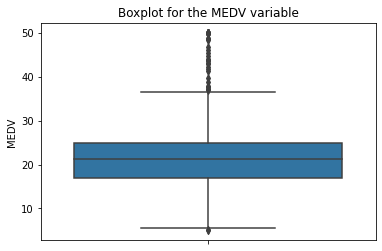

In [61]:
task_4_a = sns.boxplot(y='MEDV', data = boston_df)
c

[Text(0.5, 1.0, 'Histplot for the CHAS variable')]

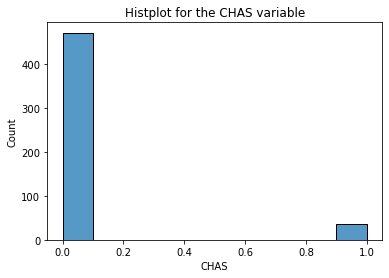

In [66]:
task_4_b = sns.histplot(x='CHAS', data = boston_df)
task_4_b.set(title="Histplot for the CHAS variable")

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'boxplot for the MEDV variable vs the AGE variable')]

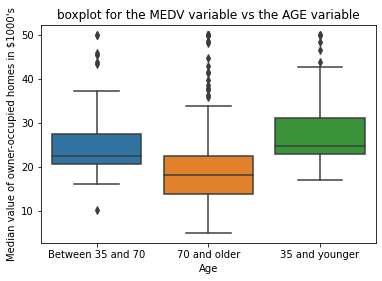

In [57]:
#Discretization

boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"
task_4_c = sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
task_4_c.set(xlabel = "Age", ylabel="Median value of owner-occupied homes in $1000's", title="boxplot for the MEDV variable vs the AGE variable")

In [50]:
boston_df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [47]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

[Text(0.5, 1.0, 'Scatterplot for the variables NOX vs INDUS'),
 Text(0.5, 0, 'NOX'),
 Text(0, 0.5, 'INDUS')]

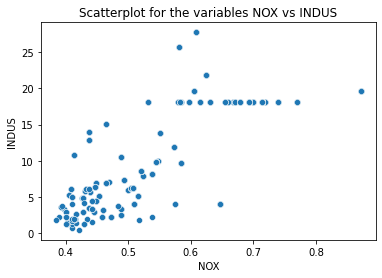

In [68]:
task_4_d = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
task_4_d.set(title = "Scatterplot for the variables NOX vs INDUS", xlabel = "NOX", ylabel = "INDUS")

[Text(0.5, 1.0, 'Histplot for the variable PTRATIO')]

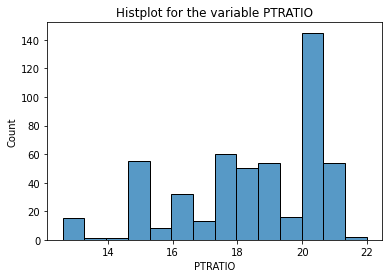

In [70]:
task_4_e = sns.histplot(x='PTRATIO', data=boston_df)
task_4_e.set(title = "Histplot for the variable PTRATIO")

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [74]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

from scipy import stats
stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

#Conclusion : As p-value is < 0.05 (assuming alpha = 0.05), we reject Null Hypothesis and Accept the Alternate Hypothesis that states there is a difference in MEDV and CHAS

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [75]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])

#Conclusion : As p-value is < 0.05 (assuming alpha = 0.05), we reject Null Hypothesis and Accept the Alternate Hypothesis that states there is a difference in MEDV and AGE

F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)

In [77]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#Conclusion : As R value is > 0.75 (Strong Positive Correlation) and P-Value < 0.05, we conclude that there exists a strong relationship and statistical significance 
#between NOX and INDUS

(0.7636514469209151, 7.913361061238693e-98)

In [93]:
#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as stat
explanatory = boston_df['DIS']
explanatory = stat.add_constant(explanatory)
target = boston_df['MEDV']
model = stat.OLS(target, explanatory)
result = model.fit()
outcome = result.predict(explanatory)
result.summary()

#Conclusion: P-Value is < 0.05 so reject Null Hypothesis. Correlation Coefficient (r) = 0.248, so weak positive correlation between MEDV and DIS, so there exists some 
# significance between the two variables. Also, the Coefficient Value 18.3901 states that there is an impact of 18.3901 in ever

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.21e-08
Time:                        06:07:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""